<a href="https://colab.research.google.com/github/raaweya/health-activity-analysis-project/blob/main/Project_CIS2423_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the needed librirites
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_1samp
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Load the dataset
health = pd.read_excel("health_activity_data.xlsx" ,sheet_name='Sheet 1 - health_activity_data', skiprows= 1)
health

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,NaN,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,NaN,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,NaN,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,NaN,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,7.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,18,Male,179,116,31.67,10095,2667,4.6,79,108/63,6.3,No,5.0,No,No
996,997,35,Female,170,114,23.88,11361,2351,7.2,54,98/75,2.9,No,3.0,No,Yes
997,998,49,Female,169,85,23.44,9531,2416,4.5,80,125/65,7.6,No,4.0,No,No
998,999,64,Male,155,74,22.34,5270,2080,5.8,101,129/86,5.4,No,4.0,No,No


In [ ]:
# Data cleaning
# Drop all rows containing at least one Nan
h1 = health.dropna()
h1

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,7.0,No,No
7,8,38,Male,178,115,28.62,13057,3262,6.7,73,136/84,8.5,Yes,6.0,No,No
10,11,36,Male,179,116,19.78,6457,1425,4.7,60,134/85,0.0,No,6.0,No,No
11,12,40,Female,188,101,25.22,7079,3013,7.7,97,111/87,5.2,Yes,5.0,No,No
12,13,28,Male,184,111,25.22,13453,3360,7.4,57,113/88,3.4,No,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,50,Male,193,79,25.76,17972,2745,6.7,98,134/65,7.2,No,7.0,No,No
995,996,18,Male,179,116,31.67,10095,2667,4.6,79,108/63,6.3,No,5.0,No,No
996,997,35,Female,170,114,23.88,11361,2351,7.2,54,98/75,2.9,No,3.0,No,Yes
997,998,49,Female,169,85,23.44,9531,2416,4.5,80,125/65,7.6,No,4.0,No,No


In [ ]:
#Imputation of empty cells
health.fillna(0 ,inplace=True)
health

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,0.0,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,0.0,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0.0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,0.0,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,7.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,18,Male,179,116,31.67,10095,2667,4.6,79,108/63,6.3,No,5.0,No,No
996,997,35,Female,170,114,23.88,11361,2351,7.2,54,98/75,2.9,No,3.0,No,Yes
997,998,49,Female,169,85,23.44,9531,2416,4.5,80,125/65,7.6,No,4.0,No,No
998,999,64,Male,155,74,22.34,5270,2080,5.8,101,129/86,5.4,No,4.0,No,No


In [ ]:
# 6. Python function for descriptive statistics
health.describe()

,ID,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,500.500000,49.857000,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,5.045500,4.38800
std,288.819436,18.114267,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,2.847801,2.95435
min,1.000000,18.000000,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.00000
25%,250.750000,35.000000,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,2.675000,2.00000
50%,500.500000,50.000000,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,5.100000,4.00000
75%,750.250000,66.000000,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,7.600000,7.00000
max,1000.000000,79.000000,199.00000,119.00000,34.980000,19931.000000,3498.000000,10.00000,119.000000,10.000000,9.00000


In [ ]:
def desriptive_statistics(health, column):
    stats = {
        "Mean": round(health[column].mean(), 2),
        "Median": health[column].median(),
        "Mode": round(health[column].mode(), 2),
        "Standard Deviation": round(health[column].std(), 2),
        "Variance": round(health[column].var(), 2),
        "Minimum": health[column].min(),
        "Maximum": health[column].max(),
        "25%": health[column].quantile(0.25),
        "50%": health[column].quantile(0.5),
        "75%": health[column].quantile(0.75),
        }
    return stats

In [ ]:
# 7. Random Sampling and Desriptive statisitcs
dependent_variable = 'Calories_Intake'

# Random sampling
random_sample = health.sample(n=150, random_state=42)

# Descriptive statistice function
random_sample_stats = desriptive_statistics(random_sample,dependent_variable)
print("Descriptive Statistics random sampling is:\n", random_sample_stats)

Descriptive Statistics random sampling is:
 {'Mean': np.float64(2272.83), 'Median': 2198.0, 'Mode': 0    1745
1    2690
2    3462
3    3463
Name: Calories_Intake, dtype: int64, 'Standard Deviation': 658.8, 'Variance': 434023.98, 'Minimum': 1204, 'Maximum': 3495, '25%': np.float64(1728.75), '50%': np.float64(2198.0), '75%': np.float64(2748.75)}


In [ ]:
# 8 A script for systematic sampling for the dependent variable from the sample
dependent_variable = 'Calories_Intake'

systematic_sampling = health.iloc[::5]

# Descriptive statistice function
systematic_sampling_stats = desriptive_statistics(systematic_sampling,dependent_variable)
print("Descriptive Statistics systematic sampling is:", systematic_sampling_stats)

Descriptive Statistics systematic sampling is: {'Mean': np.float64(2337.68), 'Median': 2391.0, 'Mode': 0    1342
1    1425
2    1745
3    2118
4    2391
5    3326
Name: Calories_Intake, dtype: int64, 'Standard Deviation': 677.09, 'Variance': 458447.48, 'Minimum': 1240, 'Maximum': 3496, '25%': np.float64(1713.0), '50%': np.float64(2391.0), '75%': np.float64(2934.5)}


In [ ]:
# 9. A detailed descriptive statistics report about the dependent variable of the chosen dataset.
def detailed_statistics_report(health, dependent_variable):
    desc_stats = {
        "Mean": health[dependent_variable].mean(),
        "Median": health[dependent_variable].median(),
        "Mode": health[dependent_variable].mode(),
        "Standard Deviation": health[dependent_variable].std(),
        "Variance": health[dependent_variable].var(),
        "Minimum": health[dependent_variable].min(),
        "Maximum": health[dependent_variable].max(),
        "Range": health[dependent_variable].max() - health[dependent_variable].min(),
        "Skewness": health[dependent_variable].skew(),
        "Kurtosis": health[dependent_variable].kurt(),
        "25%": health[dependent_variable].quantile(0.25),
        "50%": health[dependent_variable].quantile(0.5),
        "75%": health[dependent_variable].quantile(0.75),
        "IQR": health[dependent_variable].quantile(0.75) - health[dependent_variable].quantile(0.25),
    }
    return desc_stats

report = detailed_statistics_report(health, dependent_variable)
print("Detailed Descriptive statistics:",report)

Detailed Descriptive statistics: {'Mean': np.float64(2327.117), 'Median': 2328.5, 'Mode': 0    1745
Name: Calories_Intake, dtype: int64, 'Standard Deviation': 657.8479423287924, 'Variance': 432763.91522622627, 'Minimum': 1201, 'Maximum': 3498, 'Range': 2297, 'Skewness': np.float64(0.052537645427758684), 'Kurtosis': np.float64(-1.1722128102620892), '25%': np.float64(1745.75), '50%': np.float64(2328.5), '75%': np.float64(2880.0), 'IQR': np.float64(1134.25)}


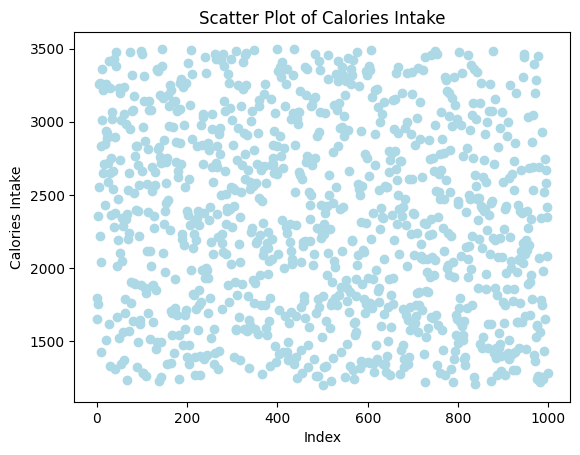

In [ ]:
# 10. Visualize the dependent variable by using Scatter plot
plt.scatter(health.index, health['Calories_Intake'], color = "lightblue")
plt.title("Scatter Plot of Calories Intake")
plt.xlabel("Index")
plt.ylabel("Calories Intake")
plt.show()

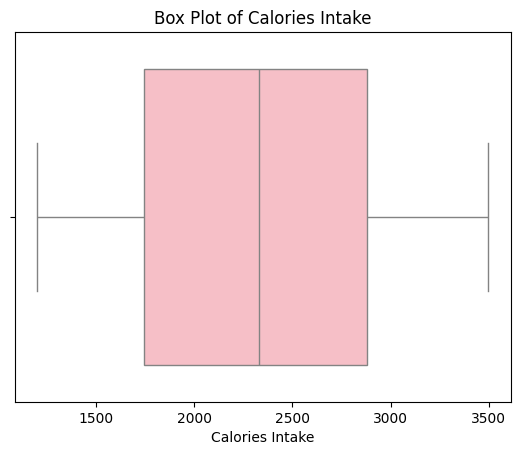

In [ ]:
# 10. Visualize the dependent variable by using Box Plot
sns.boxplot(x = health['Calories_Intake'], color = "lightpink")
plt.title("Box Plot of Calories Intake")
plt.xlabel("Calories Intake")
plt.show()

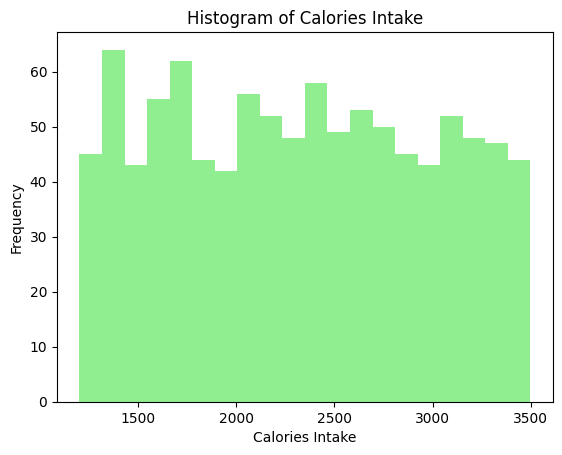

In [ ]:
# 10. Visualize the dependent variable by using Histogram
plt.hist(health['Calories_Intake'], bins = 20, color = "lightgreen")
plt.title("Histogram of Calories Intake")
plt.xlabel("Calories Intake")
plt.ylabel("Frequency")
plt.show()

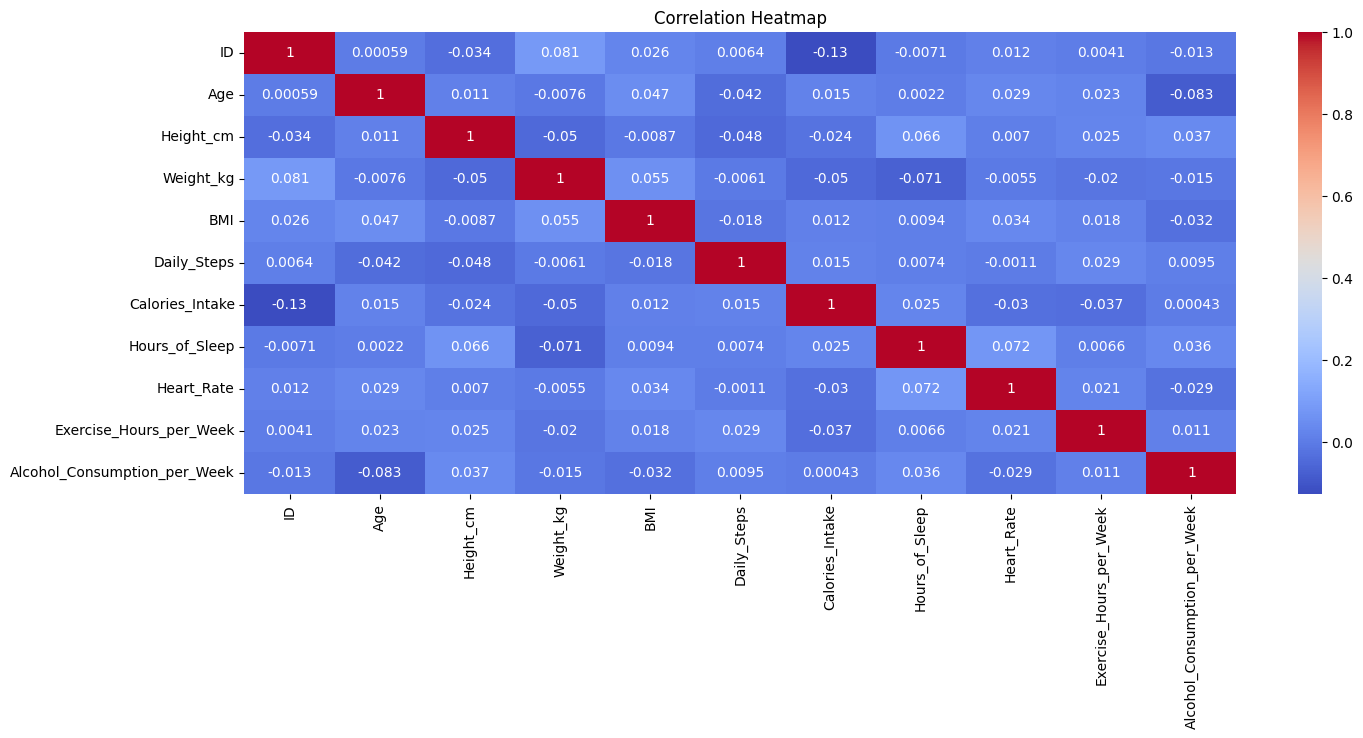

In [ ]:
# 10. Visualize the dependent variable by using Histogram
numeric_health = health.select_dtypes(include=['number'])

# Calcualte the correlation matrix
correlation_matrix = numeric_health.corr()
plt.figure(figsize=(16, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 11. Perform the hypothesis test to find the correlation between Calories Intake and Daily Steps
rvalue, pvalue = pearsonr(health['Calories_Intake'], health['Daily_Steps'])
print('rvalue: ', rvalue, 'pvalue:', pvalue)
if pvalue >= 0.05:
  print('There is no correlation between Calories Intake and Daily Steps')
else:
  print('There is a correlation between Calories Intake and Daily Steps')

rvalue:  0.0154339757743156 pvalue: 0.6259155413918182
There is no correlation between Calories Intake and Daily Steps


In [ ]:
# 11. Perform the hypothesis test to find the correlation between Calories Intake and Daily Steps
rvalue, pvalue = spearmanr(health['Calories_Intake'], health['Daily_Steps'])
print('rvalue: ', rvalue, 'pvalue:', pvalue)
if pvalue >= 0.05:
  print('There is no correlation between Calories Intake and Daily Steps')
else:
  print('There is a correlation between Calories Intake and Daily Steps')

rvalue:  0.017721978352767703 pvalue: 0.5756423354605527
There is no correlation between Calories Intake and Daily Steps


In [ ]:
# 12. Conduct a one sample t-test to assess if the sample mean of the dependent variable represent the population mean
# population mean
population_mean = health['Calories_Intake'].mean()

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(health['Calories_Intake'], population_mean)

# Print the results
print("One-sample t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

One-sample t-test:
t-statistic: 0.0
p-value: 1.0


In [ ]:
# 13. Simple Regression
X = health[['Daily_Steps']]
y = health['Calories_Intake']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('The cofficient is',regressor.coef_)
print('The intercept is',regressor.intercept_)

The cofficient is [0.00114852]
The intercept is 2321.1510697254353


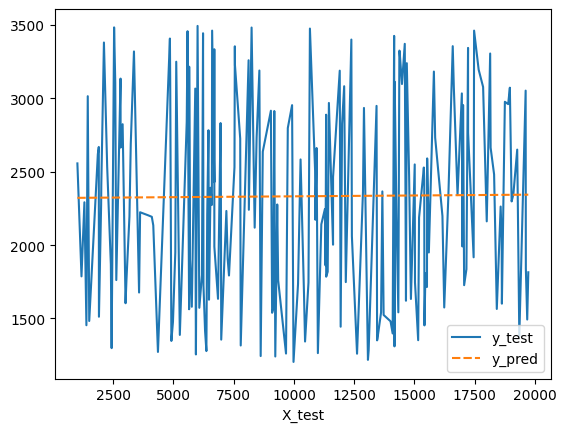

In [ ]:
# 13. Simple Regression
res = pd.DataFrame()
res['y_test'] = y_test
res['y_pred'] = y_pred
res['X_test'] = X_test
res.set_index('X_test', inplace=True)
sns.lineplot(data=res)
plt.show()

In [ ]:
# Predict the Calories Intake
result = regressor.predict([[95]])
print(result)

[2321.26017957]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
ploy = PolynomialFeatures(degree=2)
X_poly = ploy.fit_transform(X)

In [ ]:
# Polynomial regression model
regressor = LinearRegression()

# Fitting the regressor to our X and y Data
regressor.fit(X_poly, y)

# Using the fitted model tp predict the Calories Intake based on the X_test
y_pred = regressor.predict(X_poly)

# printing the cofficient and intercept of the Polynomial regression
print('The cofficient is',regressor.coef_)
print('The intercept is',regressor.intercept_)

The cofficient is [ 0.00000000e+00 -9.00410496e-03  5.14976500e-07]
The intercept is 2349.2156354206804


In [ ]:
# Predict the Calories Intake using the fitted Polynomial regression model
result = regressor.predict(X_poly[[95]])
print(result)

[2318.6489293]


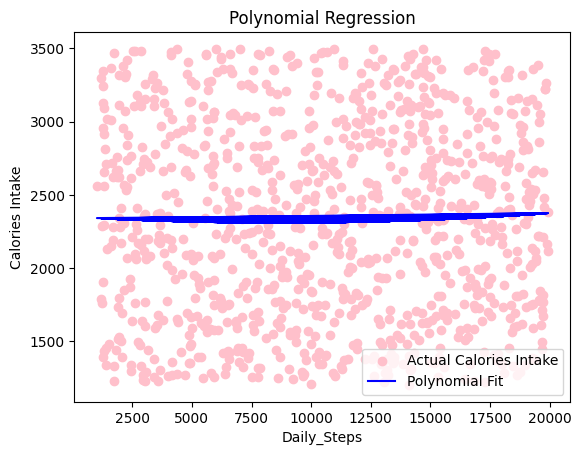

In [ ]:
# Plot the Polynomial regression
plt.scatter(X, y, color='Pink', label='Actual Calories Intake')

# Predict on the original X data to get y_pred with the correct shape
X_poly = ploy.fit_transform(X) # Changed 'poly' to 'ploy'
regressor.fit(X_poly, y)
y_pred_plot = regressor.predict(ploy.transform(X))

plt.plot(X, y_pred_plot, color='blue', label='Polynomial Fit')
plt.title("Polynomial Regression")
plt.xlabel("Daily_Steps")
plt.ylabel("Calories Intake")
plt.legend()
plt.show()

In [ ]:
# Predict the Calories Intake
result = regressor.predict([[5134, 102, 8.6]])
(result)

array([2348.29722114])

In [ ]:
# 14. # The multiple regression model
regressor = LinearRegression()

# Fitting the regressor to our X and y Data
regressor.fit(X_train, y_train)

# Using the fitted model to predict the Calories Intake based on the X_test
y_pred = regressor.predict(X_test)

# printing the cofficient and intercept of the multiple regression
print('The cofficient is',regressor.coef_)
print('The intercept is',regressor.intercept_)

The cofficient is [0.00114852]
The intercept is 2321.1510697254353


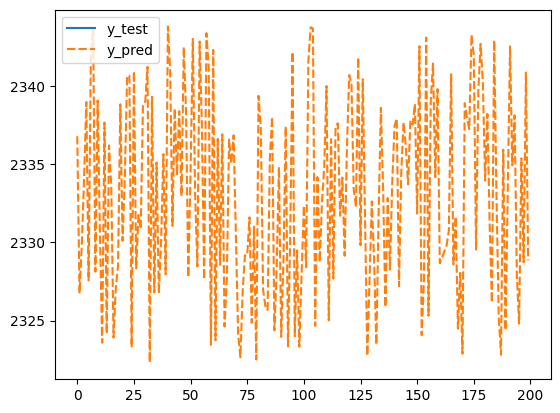

In [ ]:
# Multiple regression result
res = pd.DataFrame(y_test, columns = ['y_test'])
res['y_pred'] = y_pred
sns.lineplot(data=res)
plt.show()

In [ ]:
# 15.
# Get the dependent variable and the independent variables
X = health.iloc[ : , : -1].values
y = health.iloc[ : ,  -1].values

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fit the Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the X_test
y_pred = classifier.predict(X_test)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

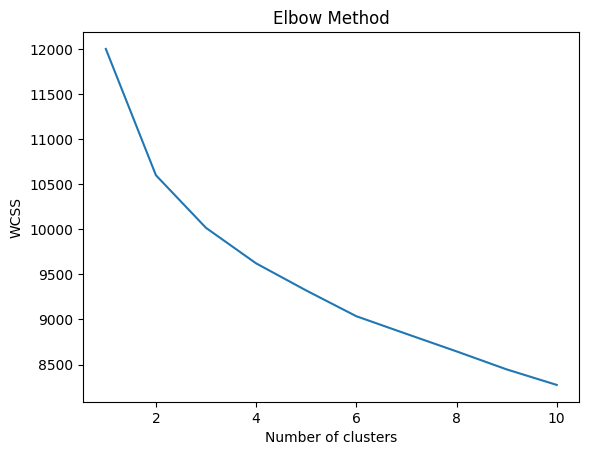

In [ ]:
#18.    Perform the cluster analysis such as K-means and Horizontal for any field from the chosen dataset.

# Select only numerical features for scaling
X_numeric = health.select_dtypes(include=['number'])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric) # Changed X to X_numeric

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fit the clustering model with 3 clusters
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X_numeric) # Fit using numerical data

# Add the cluster assignments to the DataFrame
health['KMeans_Cluster'] = y_kmeans

y_kmeans

array([1, 4, 2, 2, 2, 1, 2, 4, 0, 4, 1, 1, 4, 2, 2, 4, 2, 2, 4, 4, 4, 3,
       3, 0, 0, 4, 4, 3, 3, 4, 4, 1, 0, 1, 0, 0, 2, 1, 3, 2, 4, 0, 2, 0,
       1, 0, 0, 3, 3, 1, 2, 4, 4, 3, 1, 2, 2, 1, 3, 0, 1, 4, 3, 4, 4, 0,
       3, 3, 3, 3, 1, 1, 4, 4, 3, 3, 3, 2, 4, 2, 0, 3, 4, 3, 3, 2, 0, 2,
       1, 3, 0, 1, 2, 0, 4, 4, 4, 2, 1, 0, 2, 4, 2, 1, 0, 4, 4, 2, 0, 3,
       0, 0, 2, 3, 0, 4, 1, 3, 2, 2, 2, 3, 1, 1, 1, 1, 4, 0, 3, 4, 3, 0,
       2, 0, 1, 2, 2, 0, 3, 0, 3, 1, 2, 3, 3, 4, 3, 4, 2, 4, 1, 4, 1, 2,
       3, 1, 4, 4, 0, 3, 3, 3, 0, 3, 4, 4, 1, 1, 3, 2, 4, 2, 2, 3, 2, 4,
       2, 0, 0, 0, 1, 0, 1, 4, 4, 4, 3, 1, 1, 0, 4, 4, 3, 0, 1, 0, 0, 4,
       4, 3, 4, 0, 4, 4, 4, 4, 2, 3, 3, 3, 3, 1, 2, 1, 4, 1, 1, 3, 4, 0,
       4, 1, 2, 1, 2, 4, 0, 2, 3, 0, 0, 0, 1, 3, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 2, 4, 4, 2, 4, 1, 2, 4, 1, 4, 4, 3, 1, 2, 0, 1, 4, 1, 3,
       4, 4, 1, 3, 4, 2, 1, 0, 3, 2, 0, 2, 3, 1, 0, 3, 2, 4, 4, 3, 4, 0,
       0, 0, 1, 3, 1, 1, 1, 3, 3, 3, 4, 3, 4, 4, 2,

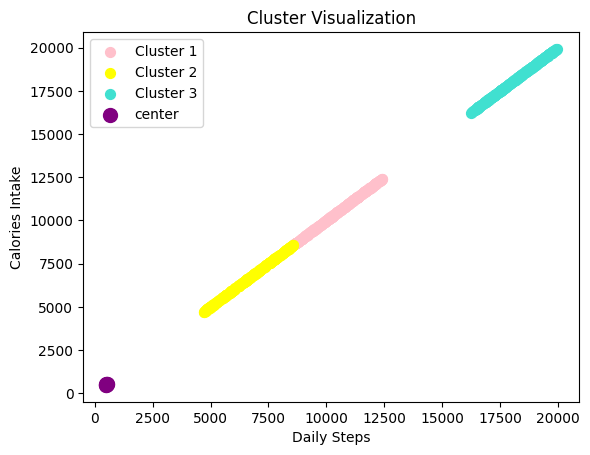

In [ ]:
plt.scatter(X_numeric[health['KMeans_Cluster'] == 0]['Daily_Steps'], X_numeric[health['KMeans_Cluster'] == 0]['Daily_Steps'], s=50, c='pink', label='Cluster 1')
plt.scatter(X_numeric[health['KMeans_Cluster'] == 1]['Daily_Steps'], X_numeric[health['KMeans_Cluster'] == 1]['Daily_Steps'], s=50, c='yellow', label='Cluster 2')
plt.scatter(X_numeric[health['KMeans_Cluster'] == 2]['Daily_Steps'], X_numeric[health['KMeans_Cluster'] == 2]['Daily_Steps'], s=50, c='Turquoise', label='Cluster 3')
# plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], s=100, c='purple', label='center')
plt.title('Cluster Visualization')
plt.xlabel('Daily Steps')
plt.ylabel('Calories Intake')
plt.legend()
plt.show()

In [ ]:
#KNN
X = health.select_dtypes(include=['number'])
y = pd.cut(health['Calories_Intake'], bins=3, labels=False)

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the KNN model
classifier = KNeighborsClassifier(n_neighbors=5 , metric='minkowski' , p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on the X_test
y_pred = classifier.predict(X_test)

In [ ]:
# Get the cofusuion matrix
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average=None)
pr = precision_score(y_test, y_pred, average=None)
print("Confusion Matrix:\n",cm)
print("Accuracy Score:",ac)
print("Recall :",rc)
print("Precision :",pr)

Confusion Matrix:
 [[41 23  0]
 [17 46  9]
 [ 2 18 44]]
Accuracy Score: 0.655
Recall : [0.640625   0.63888889 0.6875    ]
Precision : [0.68333333 0.52873563 0.83018868]


In [ ]:
# Decision Tree
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fit the DT model
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Get the cofusuion matrix
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average=None)
pr = precision_score(y_test, y_pred, average=None)
print("Confusion Matrix:\n",cm)
print("Accuracy Score:",ac)
print("Recall :",rc)
print("Precision :",pr)

Confusion Matrix:
 [[23 31 14]
 [20 30 20]
 [17 26 19]]
Accuracy Score: 0.36
Recall : [0.33823529 0.42857143 0.30645161]
Precision : [0.38333333 0.34482759 0.35849057]


In [ ]:
# Naïve-Bayes
X = health[['Daily_Steps']]
y = pd.cut(health['Calories_Intake'], bins=3, labels=False)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you want to use CategoricalNB:
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

CategoricalNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# Get the cofusuion matrix
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average=None)
pr = precision_score(y_test, y_pred, average=None)
print("Confusion Matrix:\n",cm)
print("Accuracy Score:",ac)
print("Recall :",rc)
print("Precision :",pr)

Confusion Matrix:
 [[ 2 78  1]
 [ 0 66  1]
 [ 2 50  0]]
Accuracy Score: 0.34
Recall : [0.02469136 0.98507463 0.        ]
Precision : [0.5        0.34020619 0.        ]


In [ ]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the X_test
y_pred = classifier.predict(X_test)

In [ ]:
# Get the cofusuion matrix
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average=None)
pr = precision_score(y_test, y_pred, average=None)
print("Confusion Matrix:\n",cm)
print("Accuracy Score:",ac)
print("Recall :",rc)
print("Precision :",pr)

Confusion Matrix:
 [[22 52  0]
 [14 48  0]
 [16 48  0]]
Accuracy Score: 0.35
Recall : [0.2972973  0.77419355 0.        ]
Precision : [0.42307692 0.32432432 0.        ]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
